## Instal and Import librarries for Analyse the Data

In [6]:
!pip install -r ../requirements.txt

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/d6/54/a8759957b778094233d7058c8ddbe368504b448ffe9c26a85f7bfd53584e/plotly-5.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 2.2 MB/s eta 0:00:0000:0100:01


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Read Data

In [60]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

## Information about Data

In [61]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [62]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1335,28904,Female,75.0,0,0,Yes,Self-employed,Rural,74.79,32.4,never smoked,0
1474,21491,Female,80.0,0,0,Yes,Private,Urban,213.11,34.7,never smoked,0
2377,31893,Female,28.0,0,0,Yes,Private,Rural,97.06,23.2,Unknown,0
3397,6289,Female,15.0,0,0,No,children,Urban,80.51,21.5,Unknown,0
4611,18605,Female,17.0,0,0,No,Never_worked,Urban,78.08,44.9,never smoked,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [64]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data Cleaniing

* Remove Unnecessary Column (id) ---- `df.drop(columns=['id'], axis=1, inplace=True)`
* Remove Duplicates ---- `df.drop_duplicates(inplace=True)`
* Remove null fields `bmi`, because we can not calculate bmi with existing features ---- `df.dropna(inplace=True)`
* Remove Outliers from numerical fields ---- `['age','bmi','avg_glucose_level']`

### Remove Unnecessary Column

In [65]:
df.drop(columns=['id'], axis=1, inplace=True)

In [66]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [67]:
df.count()

gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

### Remove Duplicates

In [68]:
df.drop_duplicates(inplace=True)

In [69]:
df.count()

gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

### Null Data Handling

In [70]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [71]:
# Becuase we can not calcute the BMI from existing data, So let's drop null values

df.dropna(inplace=True)
df.isnull().sum().sum()

0

## Outliers Handling

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [73]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


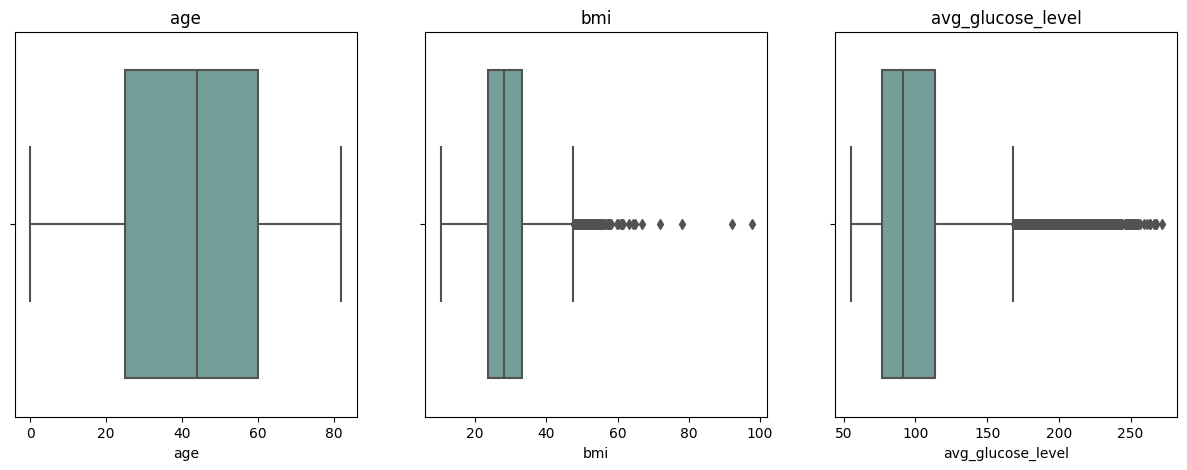

In [74]:
# num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
# hypertension, heart_disease, stroke are boolean variable which contains either 0 or 1 
num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))

for i in range(len(num_cols)):
  plt.subplot(1, 3, i+1)
  col = num_cols[i]
  plt.title(col)
  sns.boxplot(x=df[col], color='#6DA59D')

plt.show()

In [75]:
def detect_outliers(data, column):
  q1 = df[column].quantile(.25)
  q3 = df[column].quantile(.75)

  IQR = q3-q1

  print(f"column : {column}, q1 : {q1}, q3 : {q3}, IQR : {IQR}")

  lower_bound = q1 - (1.5 * IQR)
  upper_bound = q3 + (1.5 * IQR)

  ls = df.index[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
  return ls

In [76]:
index_list = []

for column in num_cols:
  index_list.extend(detect_outliers(df, column))

# Remove duplicate indices in the index_list and sort them
index_list = sorted(set(index_list))

column : age, q1 : 25.0, q3 : 60.0, IQR : 35.0
column : bmi, q1 : 23.5, q3 : 33.1, IQR : 9.600000000000001
column : avg_glucose_level, q1 : 77.07, q3 : 113.57, IQR : 36.5


In [77]:
print(len(index_list))

649


In [78]:
before_remove = df.shape

df = df.drop(index_list)

after_remove = df.shape

print(f'''Shape of data before removing outliers : {before_remove} 
Shape of data after removing outliers: {after_remove}''')

Shape of data before removing outliers : (4909, 11) 
Shape of data after removing outliers: (4260, 11)


* Remove `649` outliers successfully

## Data Visualization

Text(0.5, 0, 'Gender')

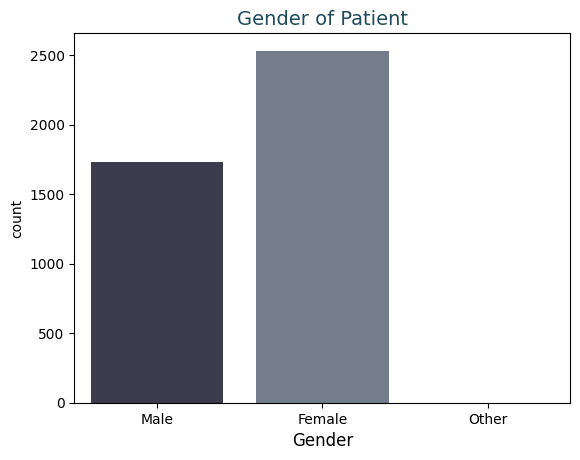

In [81]:
sns.countplot(x=df['gender'], palette='bone')
plt.title('Gender of Patient', size=14, color='#1D4B5B')
plt.xlabel('Gender', size=12)

Text(0.5, 1.0, "Distribution of patients' gender ")

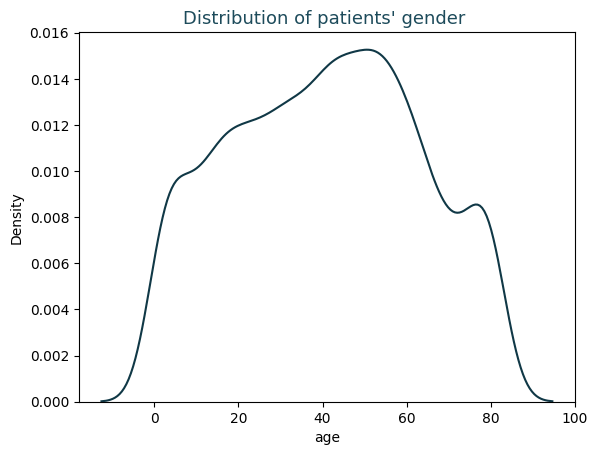

In [83]:
sns.kdeplot(df['age'], color='#103846')
plt.title('Distribution of patients\' gender ',color = '#1D4B5B',size = 13 )

In [88]:
married = dict(df['ever_married'].value_counts())
married

{'Yes': 2645, 'No': 1615}

In [93]:
!pip install nbformat

  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/f4/e7/ef30a90b70eba39e675689b9eaaa92530a71d7435ab8f9cae520814e0caf/nbformat-5.9.2-py3-none-any.whl.metadata
  Using cached nbformat-5.9.2-py3-none-any.whl.metadata (3.4 kB)
  Obtaining dependency information for fastjsonschema from https://files.pythonhosted.org/packages/9d/93/a3ca3cdeb84065d7d8f8df4cb09ab44405f109183c1d2b915ec17574e6b1/fastjsonschema-2.18.0-py3-none-any.whl.metadata
  Using cached fastjsonschema-2.18.0-py3-none-any.whl.metadata (2.0 kB)
  Obtaining dependency information for jsonschema>=2.6 from https://files.pythonhosted.org/packages/2b/ff/af59fd34bc4d7ac3e6e0cd1f3c10317d329b6c1aee179e8b24ad9a79fbac/jsonschema-4.19.0-py3-none-any.whl.metadata
  Using cached jsonschema-4.19.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/pack

In [95]:
fig = px.pie(names = married.keys(),values = married.values(),title = 'Ever Married',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Yes', 'No'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([2645, 1615])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Ever Married'}}
})

In [98]:
h_disease = dict(df['heart_disease'].value_counts())
h_disease

{0: 4105, 1: 155}

In [100]:
fig = px.pie(names = ['False', 'True'], values=h_disease.values(), title='Had a Heart Disease', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['False', 'True'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([4105,  155])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Had a Heart Disease'}}
})

In [101]:
hypertension = dict(df['hypertension'].value_counts())
fig = px.pie(names =['False','True'],values = hypertension.values(),title = 'Had a Hypertension',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['False', 'True'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([3968,  292])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Had a Hypertension'}}
})

In [102]:
work_types = dict(df['work_type'].value_counts())
fig = px.pie(names = work_types.keys(),values = work_types.values(),title = 'Work Type',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Private', 'children', 'Self-employed', 'Govt_job', 'Never_worked'],
                              dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([2415,  662,  629,  532,   22])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Work Type'}}
})

In [103]:
Residence_types = dict(df['Residence_type'].value_counts())
fig = px.pie(names = Residence_types.keys(),values = Residence_types.values(),title = 'Residence type',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Urban', 'Rural'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([2160, 2100])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Residence type'}}
})

In [104]:
smoking_status = dict(df['smoking_status'].value_counts())

fig = px.pie(names = smoking_status.keys(),values = smoking_status.values(),title = 'Smoking Status',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['never smoked', 'Unknown', 'formerly smoked', 'smokes'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([1571, 1381,  671,  637])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Smoking Status'}}
})

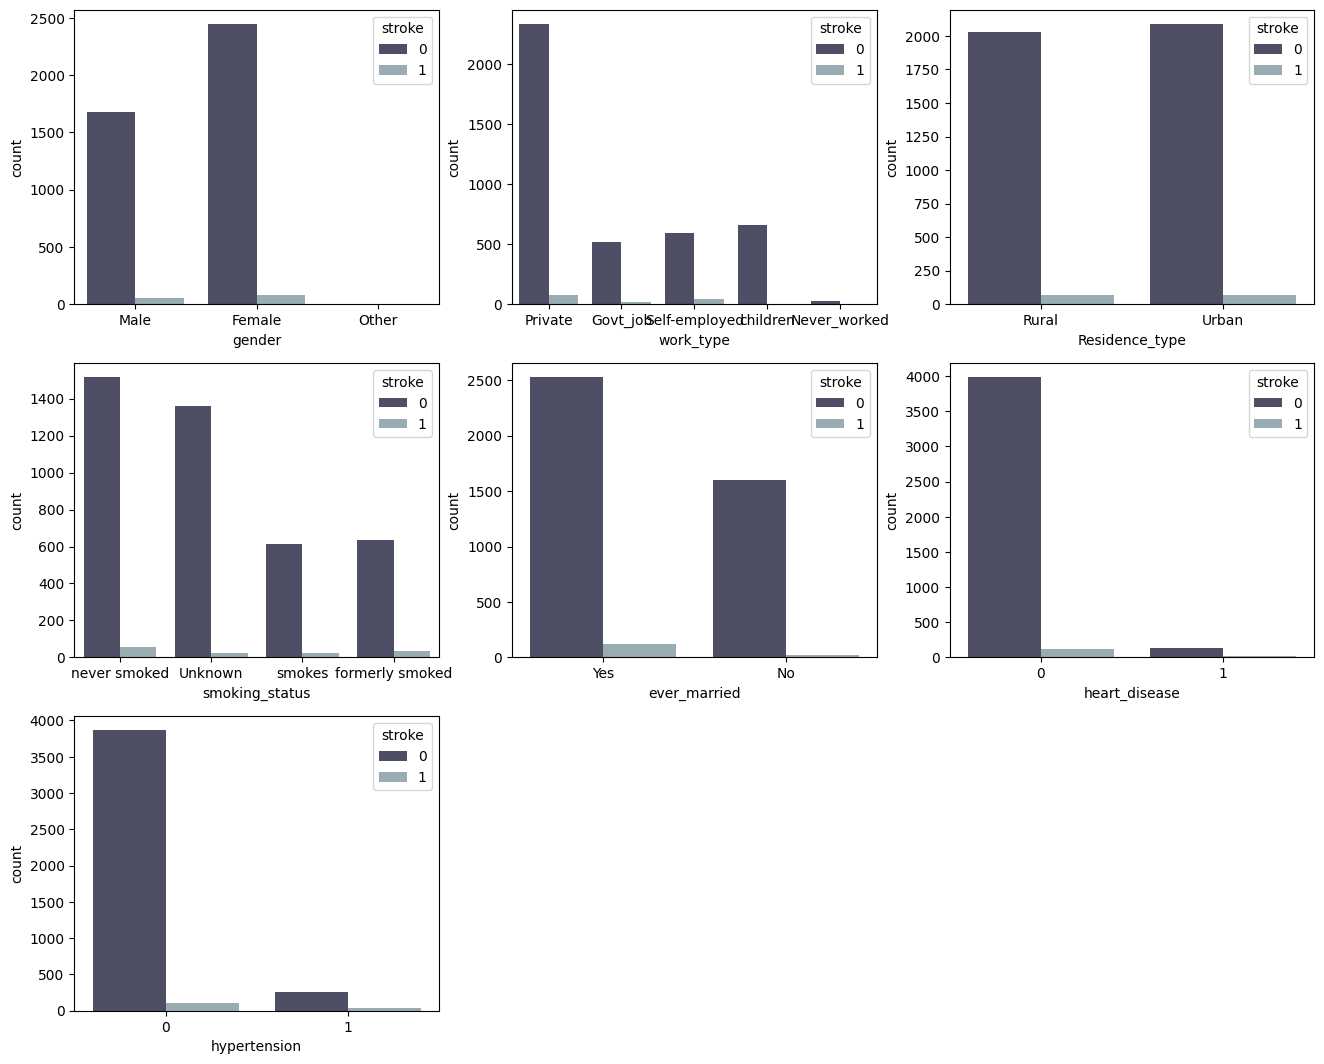

In [105]:
cols = ['gender','work_type','Residence_type',
        'smoking_status','ever_married','heart_disease',
        'hypertension']
plt.figure(figsize=(16,13))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    
    sns.countplot(x=df[cols[i]],hue = df['stroke'],palette = 'bone')

/Users/dineshchopra/Documents/Dinesh/practical/stroke_prediction/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



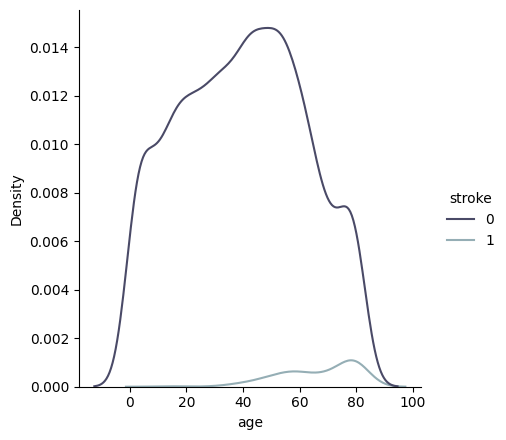

In [106]:
sns.displot(data = df , x='age',hue = 'stroke',kind = 'kde',palette = 'bone',height=4.5 )
plt.show()

/Users/dineshchopra/Documents/Dinesh/practical/stroke_prediction/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



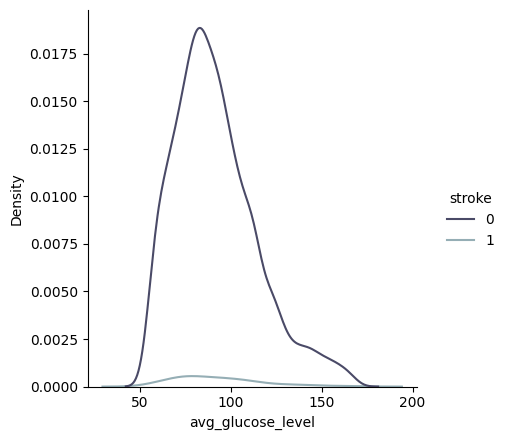

In [108]:
sns.displot(data = df , x='avg_glucose_level',hue = 'stroke',kind = 'kde',palette = 'bone',height=4.5 )
plt.show()

/Users/dineshchopra/Documents/Dinesh/practical/stroke_prediction/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



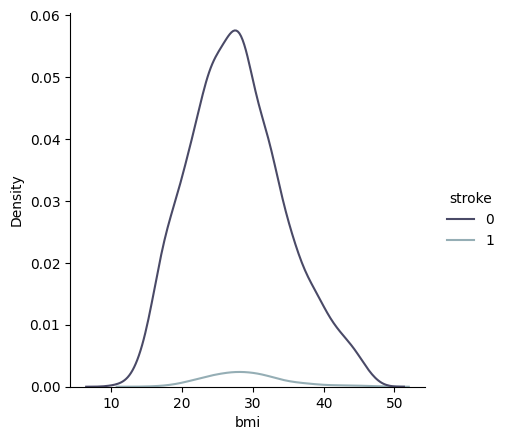

In [109]:
sns.displot(data = df , x='bmi',hue = 'stroke',kind = 'kde',palette = 'bone',height=4.5 )
plt.show()

In [110]:
stroke = dict(df['stroke'].value_counts())

fig = px.pie(names = stroke.keys(),values = stroke.values(),title = 'Stroke Occurance',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array([0, 1]),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([4124,  136])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Stroke Occurance'}}
})

### This is imbalanced dataset
* Target feature `Stroke` is imbalance data.
* `96.8%` records do not have `Stroke`
* Only `3.19%` records having stroke


## Import Libraries for ML

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, StackingClassifier

## Data Preprocessing


### Resample Unbalanced Data

In [112]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [113]:
df['stroke'].unique()

array([1, 0])

In [118]:
df_0 = df[df.iloc[:, -1] == 0]

In [119]:
df_0.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [120]:
df_1 = df[df.iloc[:, -1] == 1]

In [121]:
df_1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [124]:
df['stroke'].value_counts()

stroke
0    4124
1     136
Name: count, dtype: int64

In [126]:
df_0.shape, df_1.shape

((4124, 11), (136, 11))

In [134]:
from sklearn.utils import resample

#  It creates duplicate records in random fashion
df_1 = resample(df_1, replace=True, n_samples=df_0.shape[0], random_state=42)

In [135]:
df_0.shape, df_1.shape

((4124, 11), (4124, 11))

In [136]:
df_1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
38,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1
125,Female,72.0,0,0,Yes,Govt_job,Urban,131.41,28.4,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
52,Female,79.0,0,1,Yes,Private,Rural,127.29,27.7,never smoked,1
181,Male,59.0,0,0,Yes,Private,Urban,111.04,32.0,formerly smoked,1


In [142]:
# Concatename UpSample data
df = np.concatenate((df_0, df_1))

# Create the balanced dataframe
df = pd.DataFrame(df)
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 
              'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']

In [143]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [148]:
# Visualize balanced data

stroke = dict(df['stroke'].value_counts())
stroke

{0: 4124, 1: 4124}

In [150]:
fig = px.pie(names=['False', 'True'], values=stroke.values(), title='Stroke Occurance', 
          color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['False', 'True'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([4124, 4124])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Stroke Occurance'}}
})

### Data Balanced Successfully

## Encoding Data

In [151]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [152]:
df = pd.get_dummies(data=df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [153]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,True,False,False,False,False,False,True,False,False,False,False
1,58.0,1,0,87.96,39.2,0,True,False,True,False,True,False,False,True,False,True,False
2,8.0,0,0,110.89,17.6,0,False,False,False,False,True,False,False,True,False,False,False
3,70.0,0,0,69.04,35.9,0,False,False,True,False,True,False,False,False,True,False,False
4,14.0,0,0,161.28,19.1,0,True,False,False,True,False,False,False,False,False,False,False


## Data Split [Feature - Target]

In [154]:
X = df.drop('stroke', axis=1)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,True,False,False,False,False,False,True,False,False,False,False
1,58.0,1,0,87.96,39.2,True,False,True,False,True,False,False,True,False,True,False
2,8.0,0,0,110.89,17.6,False,False,False,False,True,False,False,True,False,False,False
3,70.0,0,0,69.04,35.9,False,False,True,False,True,False,False,False,True,False,False
4,14.0,0,0,161.28,19.1,True,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,57.0,1,0,67.41,32.9,False,False,True,False,False,False,False,False,False,True,False
8244,80.0,0,1,105.92,32.5,True,False,True,False,True,False,False,False,False,True,False
8245,46.0,0,0,78.18,30.8,False,False,True,False,True,False,False,True,False,True,False
8246,78.0,1,0,56.11,25.5,True,False,True,False,False,True,False,False,True,False,False


In [175]:
y = pd.to_numeric(df['stroke'])

In [176]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8243    1
8244    1
8245    1
8246    1
8247    1
Name: stroke, Length: 8248, dtype: int64

## Data Scaling

In [177]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [178]:
X.shape

(8248, 16)

In [179]:
X

array([[-2.20937298, -0.41162051, -0.30238783, ..., -0.50953043,
        -0.78626127, -0.44003684],
       [ 0.2158711 ,  2.42942216, -0.30238783, ..., -0.50953043,
         1.27184186, -0.44003684],
       [-1.98889625, -0.41162051, -0.30238783, ..., -0.50953043,
        -0.78626127, -0.44003684],
       ...,
       [-0.31327306, -0.41162051, -0.30238783, ..., -0.50953043,
         1.27184186, -0.44003684],
       [ 1.09777804,  2.42942216, -0.30238783, ...,  1.96259132,
        -0.78626127, -0.44003684],
       [ 0.56863388, -0.41162051, -0.30238783, ...,  1.96259132,
        -0.78626127, -0.44003684]])

## Split Data [Train - Test]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

In [181]:
X_train.shape, y_train.shape

((6598, 16), (6598,))

In [182]:
y_train

4779    1
7341    1
7460    1
1326    0
4555    1
       ..
6360    1
5725    1
516     0
1884    0
6535    1
Name: stroke, Length: 6598, dtype: int64

# Building ML Models

### Decision Tree Classifier Model

In [183]:
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy')
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [184]:
y_test_pred = decision_tree_classifier.predict(X_test)

In [185]:
accuracy_score(y_test, y_test_pred)

0.9866666666666667

## Ensemble Learning

### Random Forest Classifier Model

In [186]:
rf_model = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=123)

In [188]:
y_test_pred = rf_model.predict(X_test)

In [189]:
accuracy_score(y_test, y_test_pred)

0.9945454545454545

### Ensemble Learning - Stacking Technique
Stacking is an ensemble learning technique entails training numerous base models on the same traiining dataset, then feeding their prediction into a higher-level model, also known as a meta-model to make the final prediction.

In [191]:
base_models = [
  ('SVM', SVC()),
  ('Decision Tree', DecisionTreeClassifier()),
  ('Logistic Regression', LogisticRegression()),
  ('KNN', KNeighborsClassifier(n_neighbors=3))
]

stacking = StackingClassifier(
  estimators = base_models,
  final_estimator=LogisticRegression(),
  cv=5
)
stacking.fit(X_train, y_train)

/Users/dineshchopra/Documents/Dinesh/practical/stroke_prediction/venv/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning:

libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.



StackingClassifier(cv=5,
                   estimators=[('SVM', SVC()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Logistic Regression', LogisticRegression()),
                               ('KNN', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=LogisticRegression())

In [192]:
y_test_pred = stacking.predict(X_test)

In [193]:
accuracy_score(y_test, y_test_pred)

0.9933333333333333